### Importing the Libraries

In [5]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

### Problem 1.1

In [6]:
# Given Transition Matrix
P = np.array([[1/2,1/4,1/5],[1/3,1/2,2/5],[1/6,1/4,2/5]])
today = np.array([1,0,0])
day_after_tomorrow = np.round(np.dot(np.dot(P,P),today),3)

In [7]:
print(f"Probability of Day after tomorrow being Sunny is:{day_after_tomorrow[0]}")
print(f"Probability of Day after tomorrow being Overcast is:{day_after_tomorrow[1]}")
print(f"Probability of Day after tomorrow being Rainy is:{day_after_tomorrow[2]}")

Probability of Day after tomorrow being Sunny is:0.367
Probability of Day after tomorrow being Overcast is:0.4
Probability of Day after tomorrow being Rainy is:0.233


### Problem 1.2

In [8]:
# Finding the eigen values and eigen vectors for the matrix P
eigs, eigen=np.linalg.eig(P) #Every column is a eigen vector in eigen variable

# For a stochastic matrix, the invariant measure is the eigenvector corresponding to eigenvalue 1
inv_meas=eigen[:,0]/(np.sum(eigen[:,0])) # Dividing it is necessary to have the probabilities sum up to 1

print(f"Invariant Measure for the given transition matrix is: {inv_meas}")
# We separate the invariant measure to be used in the next question
inv_sunny, inv_overcast, inv_rainy = inv_meas

Invariant Measure for the given transition matrix is: [0.31578947 0.42105263 0.26315789]


### Problem 1.3

In [9]:
# Transition probabilities
transition_probs = {
    'Sunny': {'Sunny': 1/2, 'Rainy': 1/6, 'Overcast': 1/3},
    'Overcast': {'Sunny': 1/4, 'Rainy': 1/4, 'Overcast': 1/2},
    'Rainy': {'Sunny': 1/5, 'Rainy': 2/5, 'Overcast':2/5}
}


# Number of Parallel Simulations
num_sims = 1000

# Start state
current_state = 'Sunny'

# Simulation for 30 days
num_days = 30
chain = np.empty((num_sims,num_days),dtype = 'str')

# Setting first day as sunny for every simulation
chain[:, 0] = "Sunny" 

for n_sim in chain:
    current_state = "Sunny"
    for i in range(1, num_days):
        transition_probs_current = transition_probs[current_state]

        # Get the possible next states
        next_states = list(transition_probs_current.keys())

        # Get the probabilities for the next states
        probabilities = list(transition_probs_current.values())

        # Sample the next state based on the probabilities
        next_state = random.choices(next_states, probabilities)[0]

        # Update the current state
        current_state = next_state

        # Append the current state to the markov chain for a particular simulation, this will be done for 30 days
        n_sim[i] = current_state

In [10]:
weather_counts = {}

# Iterate over the columns (days) of the array
for i, day in enumerate(range(chain.shape[1]), 1):
    # Get the counts for 'Sunny', 'Rainy', and 'Overcast' in the current day
    sunny_count = (np.sum(chain[:, day] == 'S'))/num_sims
    rainy_count = (np.sum(chain[:, day] == 'R'))/num_sims
    overcast_count = (np.sum(chain[:, day] == 'O'))/num_sims
    
    # Create a dictionary for the current day and its counts
    day_counts = {
        'Sunny': sunny_count,
        'Overcast': overcast_count,
        'Rainy': rainy_count
    }
    
    # Add the day dictionary to the weather_counts dictionary
    weather_counts[f"Day {i}"] = day_counts

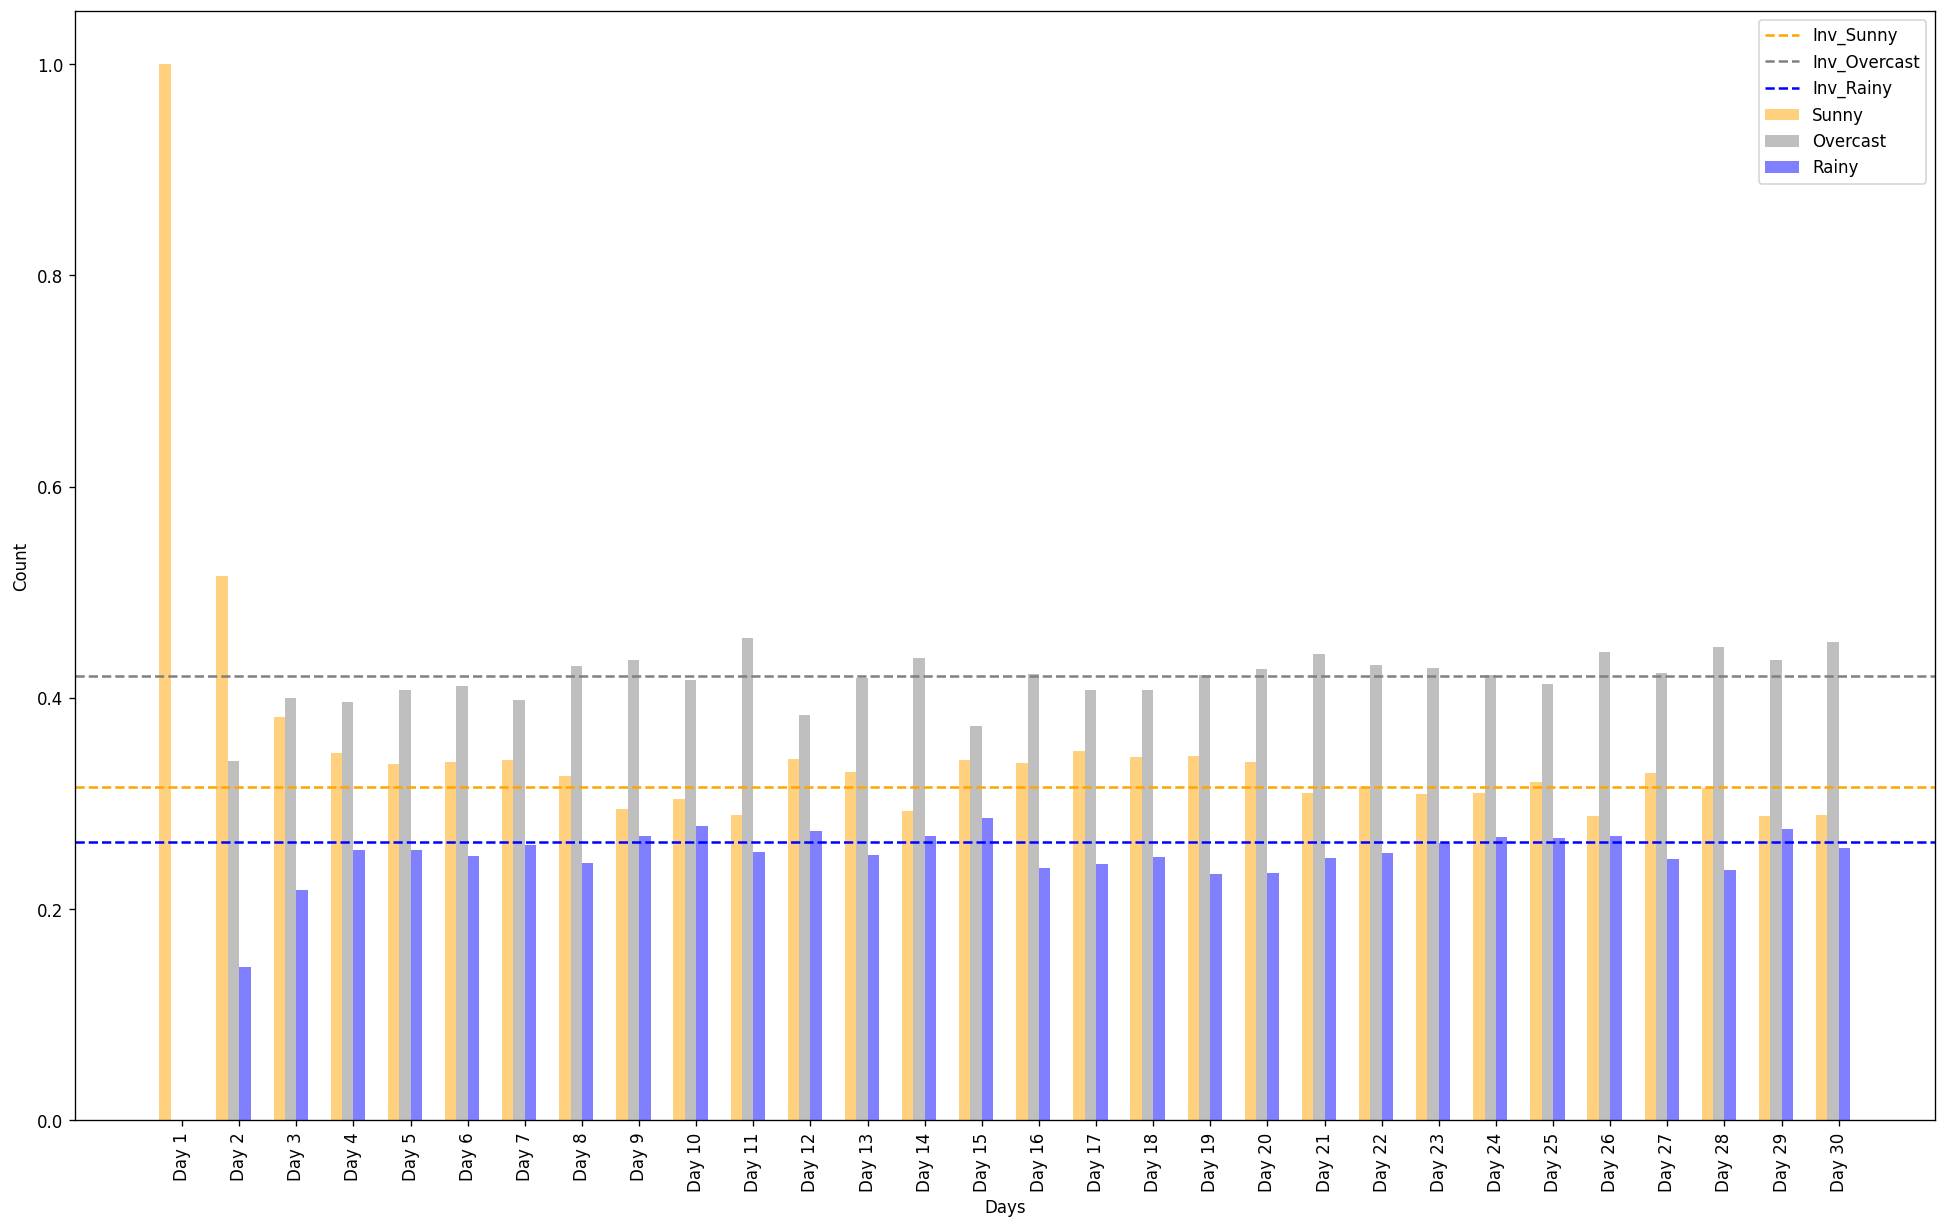

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data = weather_counts

# Extract the labels (Sunny, Rainy, Overcast)
labels = list(data['Day 1'].keys())

# Create an array of x-coordinates for each day
x = np.arange(len(data))

# Set the width of each bar
bar_width = 0.2

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 12), dpi=120)

# Define the custom color palette for each weather category
color_palette = ['orange', 'grey', 'blue']

# Iterate over each weather category
for i, weather in enumerate(labels):
    # Get the counts for the current weather category
    counts = [day[weather] for i, day in enumerate(data.values())]

    # Calculate the x-positions for the bars
    x_pos = x + (i * bar_width) - (bar_width * len(labels) / 2)

    # Plot the histogram for the current weather category with the corresponding color
    ax.bar(x_pos, counts, width=bar_width, alpha=0.5, label=weather, color=color_palette[i])

# Plotting the corresponding invariant measures
ax.axhline(y=inv_sunny, color='orange', linestyle='--', label='Inv_Sunny')
ax.axhline(y=inv_overcast, color='grey', linestyle='--', label="Inv_Overcast")
ax.axhline(y=inv_rainy, color='blue', linestyle='--', label="Inv_Rainy")

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(data.keys(), rotation=90)
ax.set_xlabel('Days')
ax.set_ylabel('Count')

# Set the legend
ax.legend()

# Show the plot
plt.show()

### Problem 1.4

As we can see over the period of 30 days, the probability of having a sunny, rainy or overcast weather is coming close to the invariant measure probabilities.
The same can be proven as follows:

The invariant measure, $p\in[0,1]^3$, is the eigenvector of $P$ for $\lambda_1=1$. <br>
$\begin{align}det(P-\lambda I)=-\lambda^3+7/5\lambda^2-13/30\lambda+1/30=0 \iff \lambda=1 \vee \lambda=1/30(6+\sqrt{6})\vee \lambda=1/30(6-\sqrt{6}),\end{align}$
then the other eigenvalues of $P$ are $\lambda_2=1/30(6+\sqrt{6}), \ \lambda_3=1/30(6+\sqrt{6})$. We notice that they are both <1, which is in line with theory since a stochastic matrix has eigenvalues 1 and the others less than 1 in module. Let be $v_2, \ v_3$ the eigenvectors corresponding to $\lambda_2$ and $\lambda_3$. <br>
Proving that the chain converges to the invariant measure means showing that:
$\begin{align}\lim_{t\to\infty} Pp_t=\lim_{t\to\infty}P^tp_1=p,\end{align}$
where $p_t$ is the distribution of $X_t$ and $p_1$ is the initial distribution. <br>
Since $p,v_2,v_3$ form a basis of $[0,1]^3$ we have:
$\begin{align}\exist \alpha,\beta,\gamma\in\mathbb{R} | \ p_1=\alpha p+\beta v_2+ \gamma v_3.\end{align}$
Now we observe that $\forall i\in\{2,3\}$ $<v_i,(1,1,1)>=0$: <br>
$Pv_i=\lambda_i v_i\iff <Pv_i,(1,1,1)>=\lambda_i<v_i,(1,1,1)>\iff\lambda_i<v_i,(1,1,1)>=\sum_{j=1}^3 {v_i}_j  (\sum_{k=1}^3 P_{kj})=<v_i,(1,1,1)>\iff <v_i,(1,1,1)>=0$,<br>
where we have used that $P$ is stochastic and that $\lambda_i<1$ (from which follows the conclusion).<br>
$p_1$ is a probability measure as well as $p$, then: 
$1=\sum_{i=1}^3{p_1}_i=<p_1,(1,1,1)>=\alpha<p,(1,1,1)>+\beta<v_2,(1,1,1)>+\gamma<v_3,(1,1,1)>=\alpha \iff \alpha=1$.<br>
Consequently:
$\begin{align}\lim_{t\to\infty}P^tp_1&=\lim_{t\to\infty}(P^tp+\beta P^tv_2+\gamma P^tv_3)=\\
&=\lim_{t\to\infty}(\lambda_1^t p+\beta \lambda_2^tv_2+\gamma \lambda_3^t v_3)=p,\end{align}$
given that $\lambda_1^t=1^t\to 1 \text{ if } t\to\infty$, while $\lambda_2,\lambda_3<1$, then  $\lambda_i^t\to 0 \text{ if } t\to\infty, \ i\in\{2,3\}$. Moreover the other quantities don't depend on t.